In [71]:
from orange_peels import Constants as c
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import os
import time

In [78]:
IMG_CONTRAST_LOW = 0.5
IMG_CONTRAST_HIGH = 1.5
PATH_IN = "data_orange_peels"
PATH_OUT_LOW = "data_orange_peels_contrast_0.5"
PATH_OUT_HIGH = "data_orange_peels_contrast_1.5"

In [79]:
start = time.time()

try: os.stat(PATH_OUT_LOW)
except: os.mkdir(PATH_OUT_LOW)

try: os.stat(PATH_OUT_HIGH)
except: os.mkdir(PATH_OUT_HIGH)

for dir in os.listdir(PATH_IN):
    for file in os.listdir(os.path.join(PATH_IN, dir)):
        if file.startswith("IMG"):
            # read in image file
            image = Image.open(os.path.join(PATH_IN, dir, file))
            image_low = ImageEnhance.Contrast(image).enhance(IMG_CONTRAST_LOW)
            image_high = ImageEnhance.Contrast(image).enhance(IMG_CONTRAST_HIGH)

            # save image
            try: os.stat(os.path.join(PATH_OUT_LOW, dir))
            except: os.mkdir(os.path.join(PATH_OUT_LOW, dir))

            try: os.stat(os.path.join(PATH_OUT_HIGH, dir))
            except: os.mkdir(os.path.join(PATH_OUT_HIGH, dir))

            image_low.save(os.path.join(PATH_OUT_LOW, dir, file))
            image_high.save(os.path.join(PATH_OUT_HIGH, dir, file))

print(f"{time.time() - start} seconds")

313.27356934547424 seconds


In [83]:
num = 0
for dir in os.listdir(PATH_IN):
    num += len([f for f in os.listdir(os.path.join(PATH_IN, dir)) if f.startswith("IMG")])
print(num)

447


In [88]:
print("Original:", sum([len([ff for ff in f if ff.startswith("IMG")]) for _, _, f in os.walk(PATH_IN)]))
print("Contrast Low:", sum([len([ff for ff in f if ff.startswith("IMG")]) for _, _, f in os.walk(PATH_OUT_LOW)]))
print("Contrast High:", sum([len([ff for ff in f if ff.startswith("IMG")]) for _, _, f in os.walk(PATH_OUT_HIGH)]))

Original: 447
Contrast Low: 447
Contrast High: 447


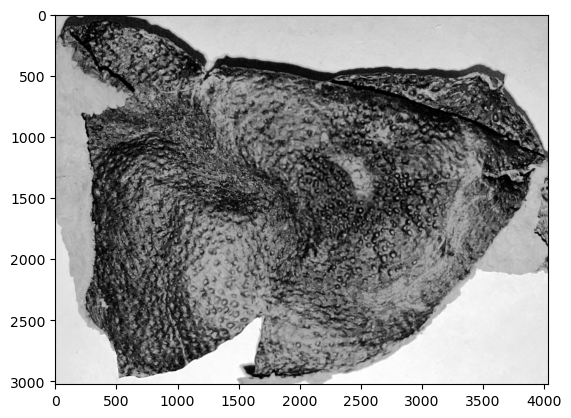

In [75]:
# equalize image
image = ImageOps.equalize(ImageOps.grayscale(image))
plt.imshow(image, cmap="gray")